---
title: "Improving Your Model Performance"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-04-06"
categories: [python, datacamp, machine learning, deep learning, tensorflow, keras,  neural network]
image: "improving-12.png"

---

# Improving Your Model Performance

You have trained a great deal of models in the previous chapters. As your models are trained, you will learn how to interpret learning curves. Additionally, you will be able to visualize the effects of activation functions, batch sizes, and batch normalization. Finally, you will learn how to use Sklearn to optimize your Keras models automatically..

This **Improving Your Model Performance** is part of [Datacamp course: Introduction to Deep Learning with Keras] There is no denying that deep learning is here to stay! A powerful innovation tool, it is used to solve complex problems arising from unstructured data. It is among the frameworks that make it easier to develop deep learning models, and it is versatile enough to build industry-ready models quickly. In this course, you will learn regression and save the earth by predicting asteroid trajectory, apply binary classification to distinguish real and fake dollar bills, learn to apply multiclass classification to decide who threw which dart at a dart board, and use neural networks to reconstruct noisy images. Additionally, you will learn how to tune your models to enhance their performance during training.

This is my learning experience of data science through DataCamp. These repository contributions are part of my learning journey through my graduate program masters of applied data sciences (MADS) at University Of Michigan, [DeepLearning.AI], [Coursera] & [DataCamp]. You can find my similar articles & more stories at my [medium] & [LinkedIn] profile. I am available at [kaggle] & [github blogs] & [github repos]. Thank you for your motivation, support & valuable feedback.

These include projects, coursework & notebook which I learned through my data science journey. They are created for reproducible & future reference purpose only. All source code, slides or screenshot are intellactual property of respective content authors. If you find these contents beneficial, kindly consider learning subscription from [DeepLearning.AI Subscription], [Coursera], [DataCamp]



[DeepLearning.AI]: https://www.deeplearning.ai
[DeepLearning.AI Subscription]: https://www.deeplearning.ai
[Coursera]: https://www.coursera.org
[DataCamp]: https://www.datacamp.com
[medium]: https://medium.com/@kamig4u
[LinkedIn]: https://www.linkedin.com/in/asadenterprisearchitect
[kaggle]: https://www.kaggle.com/kakamana
[github blogs]: https://kakamana.github.io
[github repos]: https://github.com/kakamana
[Datacamp course: Introduction to Natural Language Processing in Python]: (https://app.datacamp.com/learn/courses/introduction-to-deep-learning-with-keras)

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

# Learning curves

![](improving-1.png)
![](improving-2.png)
![](improving-3.png)

## Learning the digits

You’re going to build a model on the digits dataset, a sample dataset that comes pre-loaded with scikit learn. The digits dataset consist of 8×8 pixel handwritten digits from 0 to 9


You want to distinguish between each of the 10 possible digits given an image, so we are dealing with multi-class classification.

The dataset has already been partitioned into X_train, y_train, X_test, and y_test using 30% of the data as testing data. The labels are one-hot encoded vectors, so you don’t need to use Keras to_categorical() function.
![](improving-4.png)
Let’s build this new model!

In [2]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X = np.load('dataset/digits_pixels.npy')
y = np.load('dataset/digits_target.npy')

y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Initialize a Sequential model
model = Sequential()

# Input and hidden layer with input_shape, 16 neurons, and relu
model.add(Dense(16, input_shape=(64, ), activation='relu'))

# Output layer with 10 neurons (one per digit) and softmax
model.add(Dense(10, activation='softmax'))

# Compile your model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Test if your model is well assembled by predicting before training
print(model.predict(X_train))
print("\nPredicting on training data inputs before training can help you quickly check that your model works as expected.")

40/40 [==============================] - 0s 1ms/step
[[8.2128480e-07 2.3567786e-08 9.7470403e-01 ... 4.5982665e-06
  9.2875915e-08 8.6340833e-08]
 [5.7933591e-09 1.6378288e-05 9.6651143e-01 ... 3.1482862e-06
  1.5983840e-08 4.2088843e-08]
 [2.8876784e-06 1.5188913e-06 1.4295599e-01 ... 4.0963907e-03
  4.5322522e-05 5.7784151e-03]
 ...
 [1.1927727e-07 3.0603503e-06 6.8655521e-01 ... 1.9696778e-04
  1.3367448e-06 1.1101273e-05]
 [1.2452453e-07 1.7007787e-06 1.6920099e-01 ... 2.2053241e-03
  1.5977172e-06 1.9837904e-04]
 [3.1455049e-05 3.1653917e-04 6.9911456e-01 ... 3.8305555e-02
  7.8103389e-04 1.9169508e-02]]

Predicting on training data inputs before training can help you quickly check that your model works as expected.


## Is the model overfitting?
Let's train the model you just built and plot its learning curve to check out if it's overfitting!

In [5]:
def plot_loss(loss,val_loss):
    plt.figure();
    plt.plot(loss);
    plt.plot(val_loss);
    plt.title('Model loss');
    plt.ylabel('Loss');
    plt.xlabel('Epoch');
    plt.legend(['Train', 'Test'], loc='upper right');

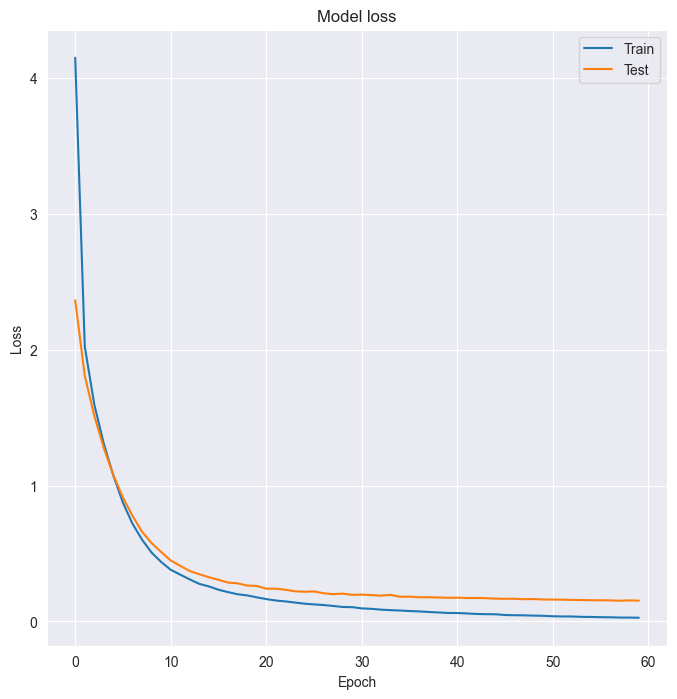

In [6]:
h_callback = model.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test), verbose=0)

# Extract from the h_callback object loss and val_loss to plot the learning curve
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

In [7]:
print("\nThis graph doesn't show overfitting but convergence. It looks like your model has learned all it could from the data and it no longer improves. The test loss, although higher than the training loss, is not getting worse, so we aren't overfitting to the training data.")


This graph doesn't show overfitting but convergence. It looks like your model has learned all it could from the data and it no longer improves. The test loss, although higher than the training loss, is not getting worse, so we aren't overfitting to the training data.


## Do we need more data?
It's time to check whether the digits dataset model you built benefits from more training examples!

In order to keep code to a minimum, various things are already initialized and ready to use:

The model you just built.
X_train,y_train,X_test, and y_test.
The initial_weights of your model, saved after using model.get_weights().
A pre-defined list of training sizes: training_sizes.
A pre-defined early stopping callback monitoring loss: early_stop.
Two empty lists to store the evaluation results: train_accs and test_accs.
Train your model on the different training sizes and evaluate the results on X_test. End by plotting the results with plot_results().

In [8]:
def plot_results(train_accs,test_accs):
    plt.plot(training_sizes, train_accs, 'o-', label="Training Accuracy");
    plt.plot(training_sizes, test_accs, 'o-', label="Test Accuracy");
    plt.title('Accuracy vs Number of training samples');
    plt.xlabel('# of training samples');
    plt.ylabel('Accuracy');
    plt.legend(loc="best");

In [9]:
initial_weights = model.get_weights()

Epoch 1/50
4/4 [==============================] - 0s 15ms/step - loss: 0.0180 - accuracy: 1.0000
Epoch 2/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0175 - accuracy: 1.0000
Epoch 3/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0166 - accuracy: 1.0000
Epoch 4/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0156 - accuracy: 1.0000
Epoch 5/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0150 - accuracy: 1.0000
Epoch 6/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0143 - accuracy: 1.0000
Epoch 7/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0132 - accuracy: 1.0000
Epoch 8/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0125 - accuracy: 1.0000
Epoch 9/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0120 - accuracy: 1.0000
Epoch 10/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0114 - accuracy: 1.0000
Epoch 11/50
4/4 [=====================

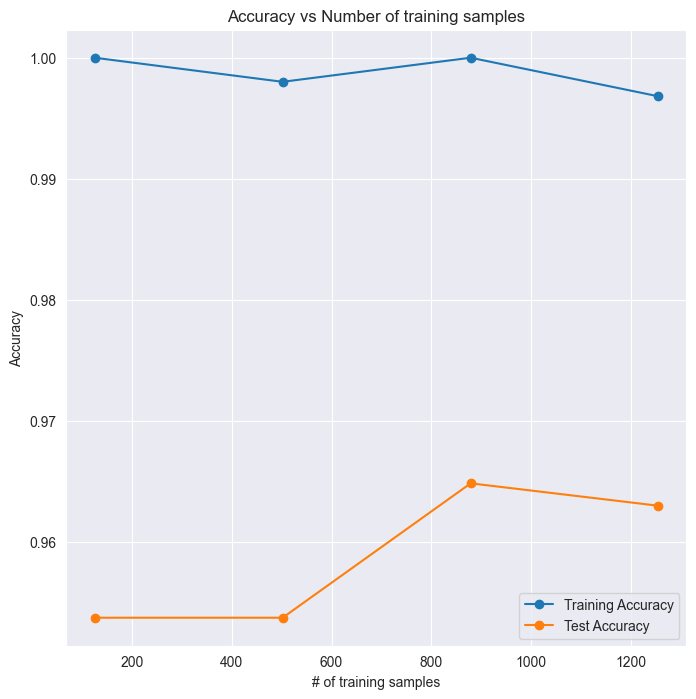

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=1)
train_accs, test_accs = [], []
training_sizes = [125, 502, 879, 1255]

for size in training_sizes:
    # Get a fraction of training data (we only care about the training data)
    X_train_frac, y_train_frac = X_train[:size], y_train[:size]

    # Reset the model to the initial weights and train it on the new training data fraction
    model.set_weights(initial_weights)
    model.fit(X_train_frac, y_train_frac, epochs=50, callbacks=[early_stop])

    # Evaluate and store both: the training data fraction and the complete test set results
    train_accs.append(model.evaluate(X_train_frac, y_train_frac)[1])
    test_accs.append(model.evaluate(X_test, y_test)[1])

# Plot train vs test accuracies
plot_results(train_accs, test_accs)

In [11]:
print("\nThe results shows that your model would not benefit a lot from more training data, since the test set accuracy is already starting to flatten. It's time to look at activation funtions")


The results shows that your model would not benefit a lot from more training data, since the test set accuracy is already starting to flatten. It's time to look at activation funtions


# Activation functions

![](improving-5.png)
![](improving-6.png)
![](improving-7.png)
![](improving-8.png)

In [13]:
irrigation = pd.read_csv('dataset/irrigation_machine.csv', index_col=0)
irrigation.head()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [14]:
parcels = irrigation[['parcel_0', 'parcel_1', 'parcel_2']].to_numpy()
sensors = irrigation.drop(['parcel_0', 'parcel_1', 'parcel_2'], axis=1).to_numpy()

X_train, X_test, y_train, y_test = \
    train_test_split(sensors, parcels, test_size=0.3, stratify=parcels)


In [15]:
np.random.seed(1)

# Return a new model with the given activation
def get_model(act_function):
    model = Sequential()
    if act_function == 'leaky_relu':
        model.add(Dense(64, input_shape=(20, ), activation=tf.nn.leaky_relu))
    else:
        model.add(Dense(64, input_shape=(20, ), activation=act_function))

    # Add an output layer of 3 neurons with sigmoid activation
    model.add(Dense(3, activation='sigmoid'))
    # Compile your model with binary crossentropy loss
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

In [16]:
activations = ['relu', 'leaky_relu', 'sigmoid', 'tanh']

# Loop over the activation functions
activation_results = {}

for act in activations:
    # Get a new model with the current activation
    model = get_model(act)

    # Fit the model and store the history results
    h_callback = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
    activation_results[act] = h_callback
    print('Finishing with {}...'.format(act))

Finishing with relu...
Finishing with leaky_relu...
Finishing with sigmoid...
Finishing with tanh...


## Comparing activation functions II
For every h_callback of each activation function in activation_results:

The h_callback.history['val_loss'] has been extracted.
The h_callback.history['val_acc'] has been extracted.

In [17]:
val_loss_per_function = {}
val_acc_per_function = {}

for k, v in activation_results.items():
    val_loss_per_function[k] = v.history['val_loss']
    val_acc_per_function[k] = v.history['val_accuracy']

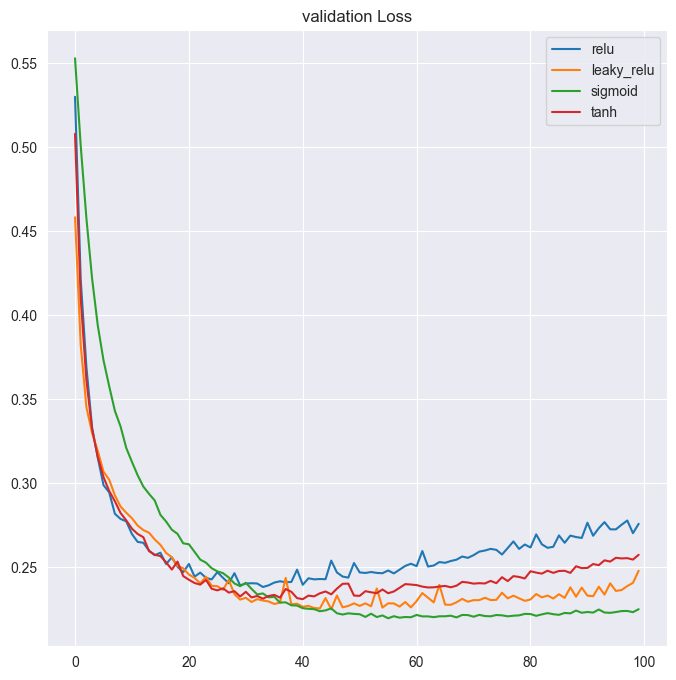

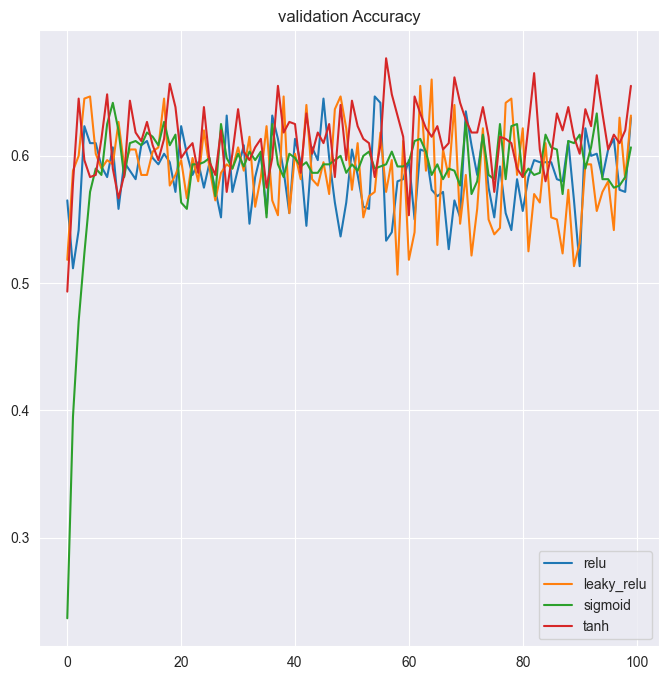

In [18]:
val_loss = pd.DataFrame(val_loss_per_function)

# Call plot on the dataframe
val_loss.plot(title='validation Loss');

# Create a dataframe from val_acc_per_function
val_acc = pd.DataFrame(val_acc_per_function)

# Call plot on the dataframe
val_acc.plot(title='validation Accuracy');

In [19]:
print("\nYou've plotted both: loss and accuracy curves. It looks like sigmoid activation worked best for this particular model as the hidden layer's activation function. It led to a model with lower validation loss and higher accuracy after 100 epochs.")


You've plotted both: loss and accuracy curves. It looks like sigmoid activation worked best for this particular model as the hidden layer's activation function. It led to a model with lower validation loss and higher accuracy after 100 epochs.


# Batch size and batch normalization
Mini-batches
Advantages
Networks train faster (more weight updates in same amount of time)
Less RAM memory required, can train on huge datasets
Noise can help networks reach a lower error, escaping local minima
Disadvantage
More iterations need to be run
Need to be adjusted, we need to find a good batch size
Batch Normalization
Advantages
Improves gradient flow
Allows higher learning rates
Reduces dependence on weight initializations
Acts as an unintended form of regularization
Limits inter covariate shift

![](improving-9.png)
![](improving-10.png)
![](improving-11.png)
![](improving-12.png)

## Changing batch sizes

You’ve seen models are usually trained in batches of a fixed size. The smaller a batch size, the more weight updates per epoch, but at a cost of a more unstable gradient descent. Specially if the batch size is too small and it’s not representative of the entire training set.

Let’s see how different batch sizes affect the accuracy of a binary classification model that separates red from blue dots.
You’ll use a batch size of one, updating the weights once per sample in your training set for each epoch. Then you will use the entire dataset, updating the weights only once per epoch.

In [32]:
dots = pd.read_csv('dataset/dots.csv')
dots.head()

,0,1,2
0,0.242655,0.038320,1
1,0.044330,-0.056673,1
2,-0.786777,-0.757186,0
3,0.004067,0.131172,1
4,-0.164107,0.150650,1


In [33]:
X = dots.iloc[:, :-1]
y = dots.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [34]:
def get_model():
    model = Sequential()
    model.add(Dense(4,input_shape=(2,),activation='relu'))
    model.add(Dense(1,activation="sigmoid"))
    model.compile('sgd', 'binary_crossentropy', metrics=['accuracy'])
    return model

In [35]:
model = get_model()

# Train your model for 5 epochs with a batch size of 1
model.fit(X_train, y_train, epochs=5, batch_size=1)
print("\n The accuracy when using a batch of size 1 is: ", model.evaluate(X_test, y_test)[1])

Epoch 1/5
700/700 [==============================] - 2s 3ms/step - loss: 0.6540 - accuracy: 0.5671
Epoch 2/5
700/700 [==============================] - 2s 3ms/step - loss: 0.6042 - accuracy: 0.6857
Epoch 3/5
700/700 [==============================] - 2s 3ms/step - loss: 0.5706 - accuracy: 0.7800
Epoch 4/5
700/700 [==============================] - 2s 3ms/step - loss: 0.5272 - accuracy: 0.8314
Epoch 5/5
10/10 [==============================] - 0s 9ms/step - loss: 0.4293 - accuracy: 0.8800

 The accuracy when using a batch of size 1 is:  0.8799999952316284


In [24]:
model = get_model()

# Fit your model for 5 epochs with a batch of size the training set
model.fit(X_train, y_train, epochs=5, batch_size=X_train.shape[0])
print("\n The accuracy when using the whole training set as batch-size was: ",
      model.evaluate(X_test, y_test)[1])

Epoch 1/5
1/1 [==============================] - 1s 505ms/step - loss: 0.7139 - accuracy: 0.4943
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 0.7137 - accuracy: 0.4943
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 0.7135 - accuracy: 0.4929
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 0.7133 - accuracy: 0.4929
Epoch 5/5
10/10 [==============================] - 0s 9ms/step - loss: 0.7075 - accuracy: 0.4767

 The accuracy when using the whole training set as batch-size was:  0.476666659116745


In [25]:
print("\nYou can see that accuracy is lower when using a batch size equal to the training set size. This is not because the network had more trouble learning the optimization function: Even though the same number of epochs were used for both batch sizes the number of resulting weight updates was very different!. With a batch of size the training set and 5 epochs we only get 5 updates total, each update computes and averaged gradient descent with all the training set observations. To obtain similar results with this batch size we should increase the number of epochs so that more weight updates take place.")


You can see that accuracy is lower when using a batch size equal to the training set size. This is not because the network had more trouble learning the optimization function: Even though the same number of epochs were used for both batch sizes the number of resulting weight updates was very different!. With a batch of size the training set and 5 epochs we only get 5 updates total, each update computes and averaged gradient descent with all the training set observations. To obtain similar results with this batch size we should increase the number of epochs so that more weight updates take place.


## Batch normalizing a familiar model

![](improving-13.png)

A multi-class classification problem that you solved using softmax and 10 neurons in your output layer. You will now build a new deeper model consisting of 3 hidden layers of 50 neurons each, using batch normalization in between layers. The kernel_initializer parameter is used to initialize weights in a similar way.

In [26]:
from tensorflow.keras.layers import BatchNormalization

# Build your deep network
batchnorm_model = Sequential()
batchnorm_model.add(Dense(50, input_shape=(64, ), activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(10, activation='softmax', kernel_initializer='normal'))

# Compile your model with sgd
batchnorm_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

## Batch normalization effects
Batch normalization tends to increase the learning speed of our models and make their learning curves more stable. Let's see how two identical models with and without batch normalization compare.

The model you just built batchnorm_model is loaded for you to use. An exact copy of it without batch normalization: standard_model, is available as well.

You will compare the accuracy learning curves for both models plotting them with compare_histories_acc().

In [27]:
def compare_histories_acc(h1,h2):
    plt.plot(h1.history['accuracy']);
    plt.plot(h1.history['val_accuracy']);
    plt.plot(h2.history['accuracy']);
    plt.plot(h2.history['val_accuracy']);
    plt.title("Batch Normalization Effects");
    plt.xlabel('Epoch');
    plt.ylabel('Accuracy');
    plt.legend(['Train', 'Test', 'Train with Batch Normalization', 'Test with Batch Normalization'], loc='best');

In [28]:
X = np.load('dataset/digits_pixels.npy')
y = np.load('dataset/digits_target.npy')

y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
standard_model = Sequential()
standard_model.add(Dense(50, input_shape=(64, ), activation='relu', kernel_initializer='normal'))
standard_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
standard_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
standard_model.add(Dense(10, activation='softmax', kernel_initializer='normal'))

# Compile your model with sgd
standard_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
# Train your standard model, storing its history callback
h1_callback = standard_model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, verbose=0)

# Train the batch normalized model you recently built, store its history callback
h2_callback = batchnorm_model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, verbose=0)

# Call compare_histories_acc passing in both model histories
compare_histories_acc(h1_callback, h2_callback)

ValueError: in user code:

    File "/Users/kakamana/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/kakamana/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/kakamana/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/kakamana/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/kakamana/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/kakamana/opt/anaconda3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_9" is incompatible with the layer: expected shape=(None, 64), found shape=(None, 2)


In [38]:
print("\nou can see that for this deep model batch normalization proved to be useful, helping the model obtain high accuracy values just over the first 10 training epochs")


ou can see that for this deep model batch normalization proved to be useful, helping the model obtain high accuracy values just over the first 10 training epochs


# Hyperparameter tuning
* Neural network hyperparameters
    * Number of layers
    * Number of neurons per layer
    * Layer order
    * Layer activations
    * Batch sizes
    * Learning rates
    * Optimizers
    * ...
* Tips for neural networks hyperparameter tuning
    * Random search is preferred over grid search
    * Don't use many epochs
    * Use a smaller sample of your dataset
    * Play with batch sizes, activations, optimizers and learning rates

Preparing a model for tuning
Let's tune the hyperparameters of a binary classification model that does well classifying the breast cancer dataset.

You've seen that the first step to turn a model into a sklearn estimator is to build a function that creates it. The definition of this function is important since hyperparameter tuning is carried out by varying the arguments your function receives.

Build a simple create_model() function that receives both a learning rate and an activation function as arguments.

In [39]:
def create_model(learning_rate=0.01, activation='relu'):
    # Create an Adam optimizer with the given learning rate
    opt = tf.keras.optimizers.Adam(lr=learning_rate)

    # Create your binary classification model
    model = Sequential()
    model.add(Dense(128, input_shape=(30, ), activation=activation))
    model.add(Dense(256, activation=activation))
    model.add(Dense(1, activation='sigmoid'))

    # Compile your model with your optimizer, loss and metrics
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

## Tuning the model parameters
It's time to try out different parameters on your model and see how well it performs!

The create_model() function you built in the previous exercise is ready for you to use.

Since fitting the RandomizedSearchCV object would take too long, the results you'd get are printed in the show_results() function. You could try random_search.fit(X,y) in the console yourself to check it does work after you have built everything else, but you will probably timeout the exercise (so copy your code first if you try this or you can lose your progress!).

You don't need to use the optional epochs and batch_size parameters when building your KerasClassifier object since you are passing them as params to the random search and this works already.

In [41]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)

In [42]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

# Create a KerasClassifier
model = KerasClassifier(build_fn=create_model)

# Define the parameters to try out
params = {
    'activation': ['relu', 'tanh'],
    'batch_size': [32, 128, 256],
    'epochs': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create a randomize search cv object passing in the parameters to try out
random_search = RandomizedSearchCV(model, param_distributions=params, cv=KFold(3))
random_search_results = random_search.fit(X, y, verbose=0)

# Print results
print("Best: {} using {}".format(random_search_results.best_score_,
                                 random_search_results.best_params_))

/var/folders/gk/g6hht_993hbcv0ffg5wyh8f00000gn/T/ipykernel_22129/3131661587.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


1/1 [==============================] - 0s 172ms/step - loss: 0.1833 - accuracy: 0.9211


1/1 [==============================] - 0s 95ms/step - loss: 0.1842 - accuracy: 0.9263


1/1 [==============================] - 0s 97ms/step - loss: 0.2332 - accuracy: 0.9153


6/6 [==============================] - 0s 18ms/step - loss: 0.6003 - accuracy: 0.8737


6/6 [==============================] - 0s 14ms/step - loss: 0.9381 - accuracy: 0.8526


6/6 [==============================] - 0s 18ms/step - loss: 0.1766 - accuracy: 0.9312


2/2 [==============================] - 0s 75ms/step - loss: 0.1991 - accuracy: 0.9105


2/2 [==============================] - 0s 76ms/step - loss: 0.1866 - accuracy: 0.9474


2/2 [==============================] - 0s 60ms/step - loss: 0.1935 - accuracy: 0.9101


2/2 [==============================] - 0s 54ms/step - loss: 0.1743 - accuracy: 0.9316


2/2 [==============================] - 0s 50ms/step - loss: 0.1432 - accuracy: 0.9474


2/2 [==============================] - 0s 68ms/step - loss: 0.1362 - accuracy: 0.9630


1/1 [==============================] - 0s 101ms/step - loss: 0.2719 - accuracy: 0.9105


1/1 [==============================] - 0s 131ms/step - loss: 0.1843 - accuracy: 0.9263


1/1 [==============================] - 0s 105ms/step - loss: 0.4219 - accuracy: 0.8730


2/2 [==============================] - 0s 73ms/step - loss: 0.1939 - accuracy: 0.9211


2/2 [==============================] - 0s 64ms/step - loss: 0.2279 - accuracy: 0.9105


2/2 [==============================] - 0s 77ms/step - loss: 0.2244 - accuracy: 0.9153


1/1 [==============================] - 0s 135ms/step - loss: 0.2112 - accuracy: 0.9316


1/1 [==============================] - 0s 134ms/step - loss: 0.1692 - accuracy: 0.9211


1/1 [==============================] - 0s 137ms/step - loss: 0.1420 - accuracy: 0.9577


6/6 [==============================] - 0s 19ms/step - loss: 0.2081 - accuracy: 0.9211


6/6 [==============================] - 0s 17ms/step - loss: 0.1688 - accuracy: 0.9316


6/6 [==============================] - 0s 20ms/step - loss: 0.1565 - accuracy: 0.9259


6/6 [==============================] - 0s 26ms/step - loss: 0.1589 - accuracy: 0.9526


6/6 [==============================] - 0s 32ms/step - loss: 0.1957 - accuracy: 0.9105


6/6 [==============================] - 0s 28ms/step - loss: 0.2499 - accuracy: 0.8942


1/1 [==============================] - 0s 185ms/step - loss: 0.2303 - accuracy: 0.9158


1/1 [==============================] - 0s 129ms/step - loss: 0.1513 - accuracy: 0.9211


1/1 [==============================] - 0s 155ms/step - loss: 0.3381 - accuracy: 0.8942


Best: 0.9473034540812174 using {'learning_rate': 0.001, 'epochs': 200, 'batch_size': 128, 'activation': 'relu'}


## Training with cross-validation
Time to train your model with the best parameters found: 0.01 for the learning rate, 100 epochs, a 128 batch_size and relu activations.

Use the best values found for your model when creating your KerasClassifier object so that they are used when performing cross_validation.

End this chapter by training an awesome tuned model on the breast cancer dataset!

In [43]:
from sklearn.model_selection import cross_val_score

# Create a KerasClassifier
model = KerasClassifier(build_fn=create_model,
                        epochs=100, batch_size=128, verbose=0)

# Calculate the accuracy score for each fold
kfolds = cross_val_score(model, X, y, cv=3)

# Print the mean accuracy
print('The mean accuracy was: ', kfolds.mean())

# Print the accuracy standard deviation
print('With a standard deviation of: ', kfolds.std())

/var/folders/gk/g6hht_993hbcv0ffg5wyh8f00000gn/T/ipykernel_22129/1695400244.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model,


The mean accuracy was:  0.9121971527735392
With a standard deviation of:  0.03695947759704949
